In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [61]:
titanic = pd.read_csv('titanic-data.csv')

In [62]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [64]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
titanic.shape

(891, 12)

In [66]:
# Drop columns which will not be used for analysis
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [67]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
titanic.fillna(titanic.mean(), inplace = True)

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [70]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [71]:
titanic.dropna(inplace=True)

In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


# What is the structure of the dataset?

There are 891 details of passengers in the titanic dataset; each having 12 features. The features are related to Passenger Id, Name, Class of travel, whether the passenger survived or not, sex, age, siblings/spouse, parents/childrem, cabin, embarked etc. Most of the features are numeric in nature, with a couple identified as string. The columns of Passenger ID, name, ticket and cabin were dropped as they would not be used in the analysis.

# What are the main features of interest in the dataset?

My main feature of interest to explore will be the relationship between the passengers who survived (or died) with the class of travel, age, fare and if they had siblings, spouse or children.

# What features in the dataset will help support the investigation into the feature(s) of interest?

I assume fare and class of travel will have an impact on the survival rates in the dataset.

In [73]:
survived = titanic.Survived == True
died = titanic.Survived == False

In [74]:
titanic.Fare[survived].mean()

48.209498235294106

In [75]:
titanic.Fare[died].mean()

22.117886885245877

Univariate Exploration

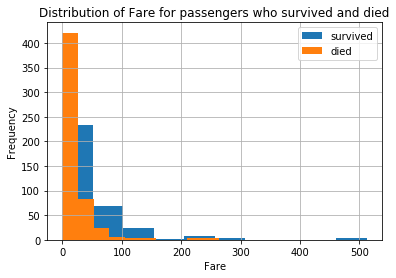

In [76]:
titanic.Fare[survived].hist(label = 'survived')
titanic.Fare[died].hist(label = 'died')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of Fare for passengers who survived and died")
plt.legend();

The above plot shows the fare distribution for passengers who survived and who died. It is seen that more passengers who paid a low fare died, whereas those passengers who paid a higher fare had a higher chance of survival.

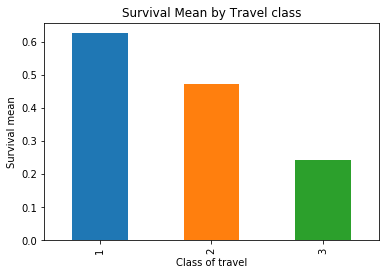

In [77]:
titanic.groupby('Pclass').Survived.mean().plot(kind='bar')
plt.xlabel("Class of travel")
plt.ylabel("Survival mean")
plt.title("Survival Mean by Travel class");

The above graph shows that passengers in Class 1 had a higher chance of survival than those in class 2 and class 3.

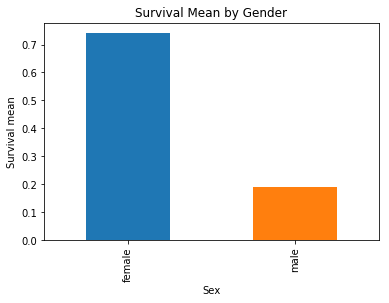

In [78]:
titanic.groupby('Sex').Survived.mean().plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Survival mean")
plt.title("Survival Mean by Gender");

The above plot shows the survival rate by gender. Females were more likely to survive than males.

Bivariate Exploration

In [79]:
titanic.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

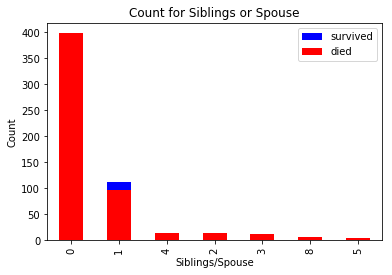

In [80]:
titanic.SibSp[survived].value_counts().plot(kind='bar', label = 'survived', color = 'blue')
titanic.SibSp[died].value_counts().plot(kind='bar', label = 'died', color = 'red')
plt.legend()
plt.xlabel("Siblings/Spouse")
plt.ylabel("Count")
plt.title("Count for Siblings or Spouse");

The above plot shows the survival count for people having a spouse or sibling. It can be seen that passengers who did not have a spouse or sibling were more likely to die.

In [81]:
titanic.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

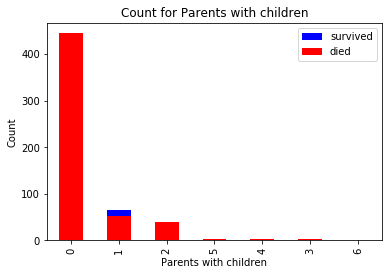

In [82]:
titanic.Parch[survived].value_counts().plot(kind='bar', label = 'survived', color = 'blue')
titanic.Parch[died].value_counts().plot(kind='bar', label = 'died', color = 'red')
plt.legend()
plt.xlabel("Parents with children")
plt.ylabel("Count")
plt.title("Count for Parents with children");

The above plot shows the survival count for parents with children. It can be seen that passengers who did not have a child were more likely to die. Parents with one child had a higher chance of survival.

In [83]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

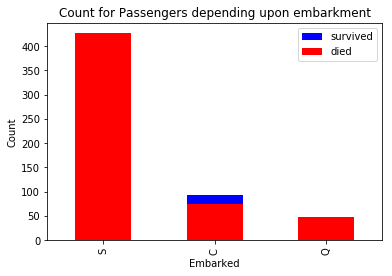

In [84]:
titanic.Embarked[survived].value_counts().plot(kind='bar', label = 'survived', color = 'blue')
titanic.Embarked[died].value_counts().plot(kind='bar', label = 'died', color = 'red')
plt.legend()
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Count for Passengers depending upon embarkment");

MultiVariate Exploration

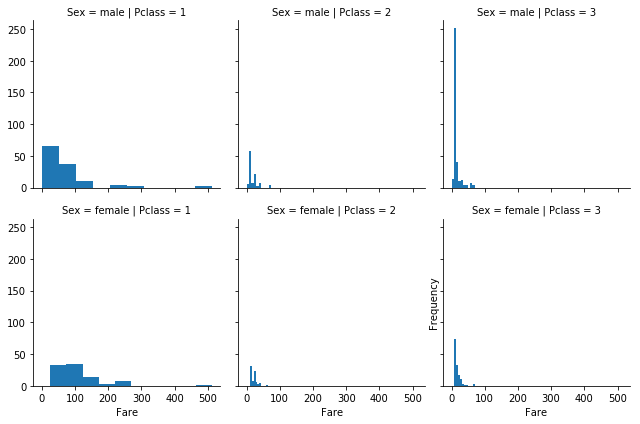

In [85]:
x = sns.FacetGrid(titanic, row = "Sex", col = "Pclass")
x = x.map(plt.hist, "Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency");

The above plots show the distribution of fares with respect to the different class of travel for both males and females. Class 3 had a higher number of males and females at a lower fare, while there were more males in the Class 1 travel.

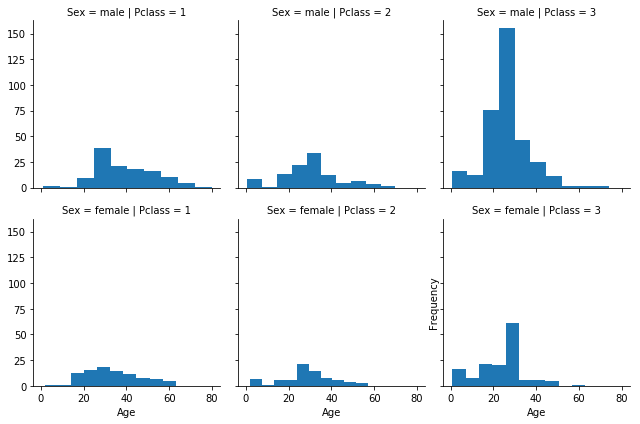

In [86]:
x = sns.FacetGrid(titanic, row = "Sex", col = "Pclass")
x = x.map(plt.hist, "Age")
plt.xlabel("Age")
plt.ylabel("Frequency");

The above plots show the distribution of age with respect to the different class of travel for both males and females.Class 3 had more males and females in the mid age range (i.e. between 20-30 years), while class 1 had more males in the higher age bracket (between 30-60 years). 

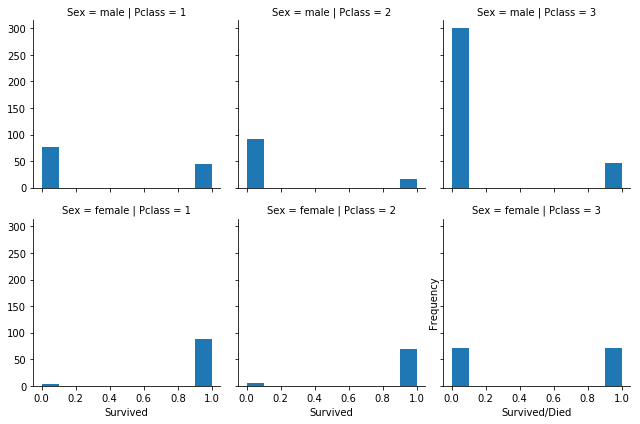

In [87]:
x = sns.FacetGrid(titanic, row = "Sex", col = "Pclass")
x = x.map(plt.hist, "Survived")
plt.xlabel("Survived/Died")
plt.ylabel("Frequency");

The above plots show the distribution of survival or death with respect to the different class of travel for both males and females. More males died in Class 3, while more females survived in class 1. All the classes had more male deaths than survival, and class 1 and 2 had more females surviving.

The multivariate analysis shows that category of class travel does have an impact on survival rates between males and females.